# Import Packages and Read Data

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
X_train_stand = np.load('X_train_stand.npy')
X_test_stand = np.load('X_test_stand.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Import Packages for Artificial Neural Network

In [ ]:
import keras
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

print(tf.__version__)

2.15.0


In [ ]:
X_train_stand.shape

(426, 30)

# Building and Training Two-layer Neural Network

In [ ]:
two_layer = Sequential()
two_layer.add(keras.layers.Dense(units = 15, input_shape = (X_train_stand.shape[1],), activation='relu')) # input layer
two_layer.add(keras.layers.Dense(5, activation = 'relu')) # hidden layer
two_layer.add(keras.layers.Dense(1, activation = 'sigmoid')) # output layer

c:\Users\Mobility\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
two_layer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN to the Training set
random.seed(42)
opt = tf.optimizers.SGD(learning_rate=0.01)
two_layer.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = two_layer.fit(X_train_stand, y_train, batch_size = 10, epochs = 15, validation_data=(X_test_stand, y_test))

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5087 - loss: 0.7235 - val_accuracy: 0.7762 - val_loss: 0.5712
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8184 - loss: 0.5339 - val_accuracy: 0.9091 - val_loss: 0.4540
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9411 - loss: 0.4353 - val_accuracy: 0.9510 - val_loss: 0.3647
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.3604 - val_accuracy: 0.9510 - val_loss: 0.2909
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9629 - loss: 0.2877 - val_accuracy: 0.9650 - val_loss: 0.2331
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9674 - loss: 0.2381 - val_accuracy: 0.9720 - val_loss: 0.1898
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9644 - loss: 0.1899 - val_accuracy: 0.9720 - val_loss: 0.1581
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9702 - loss: 0.1667 - val_accuracy: 0.9790 - val_loss

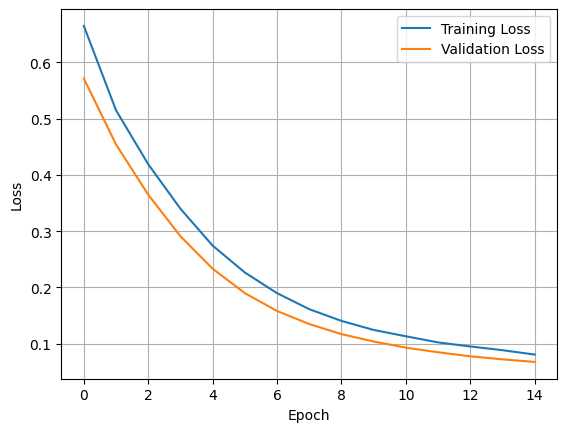

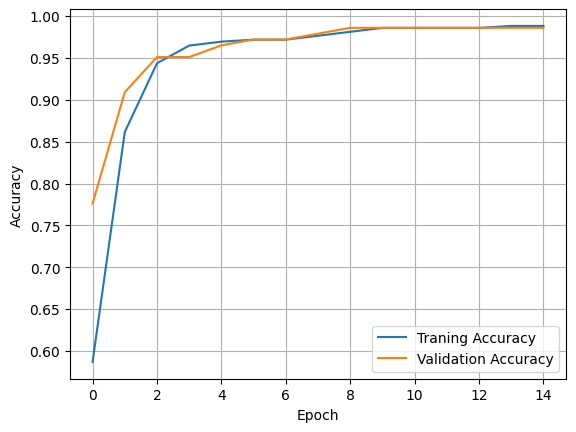

In [ ]:
import matplotlib.pyplot as plt

# History for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training Loss", "Validation Loss"], )
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# History for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Traning Accuracy", "Validation Accuracy"])
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Testing results
- Feed the test data in and obtain a high accuracy score of **0.986** on test data

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_auc_score, f1_score, precision_score

two_layer_pred_proba = two_layer.predict(X_test_stand)
two_layer_pred_proba = np.ndarray.flatten(two_layer_pred_proba)
two_layer_pred = two_layer_pred_proba > 0.5
cm, acc = confusion_matrix(y_test, two_layer_pred), accuracy_score(y_test, two_layer_pred)
precision, recall = precision_score(y_test, two_layer_pred), recall_score(y_test, two_layer_pred)
f1, roc_auc = f1_score(y_test, two_layer_pred), roc_auc_score(y_test, two_layer_pred)
print(f"confusion matrix: \n{cm}")
print(f"accuracy score: {acc}")
print(f"precision score: {precision}")
print(f"recall score: {recall}")
print(f"f1 score: {f1}")
print(f"ROC AUC score: {roc_auc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
confusion matrix: 
[[54  0]
 [ 2 87]]
accuracy score: 0.986013986013986
precision score: 1.0
recall score: 0.9775280898876404
f1 score: 0.9886363636363636
ROC AUC score: 0.9887640449438202


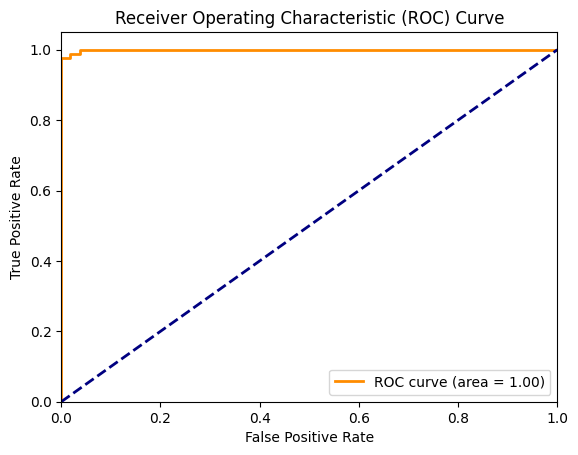

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, two_layer_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
